## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8.5

In [2]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

In [163]:
def scale_data(x_data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x_data)

def pair_plot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

def graph_by_points(x, y, x_name, y_name):
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.plot(x, y)
    ax2.set_xlabel(x_name)
    ax2.set_ylabel(y_name)
    ax2.grid()
    ax2.legend()

    f.show()


In [4]:
practice_data = pandas.read_csv('./homework-practice-03-data.csv')
x_practice_data = practice_data.drop(columns=['f1'])
y_practice_data = practice_data['f1']

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `practice_data`, на обучающую и тестовую части в соотношении 8:2.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
        x_practice_data, y_practice_data, train_size=0.8, random_state=42)
x_train.head()

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,f0,f2,f3,f4,f5,f6
228,13.28,8.947412,1.854125,0.304199,0.637632,724.955750
208,24.27,0.731584,4.289619,0.991890,0.873039,1514.920900
96,27.28,1.730259,1.431718,0.859581,0.513208,58.940865
167,31.71,-2.800439,-2.605946,0.878373,2.113398,7614.162600
84,15.98,1.332029,9.779562,0.983426,1.473478,1886.239400


#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [118]:
x_train_scaled = scale_data(x_train)
x_test_scaled = scale_data(x_test)

def train_and_print_r2_score(model, train_data, test_data):
    model.fit(*train_data)
    print("  model has been trained")
    prediction = model.predict(test_data[0])
    print("  model r2_score:", r2_score(prediction, test_data[1]))

print("simple_linear_model:")
simple_linear_model = LinearRegression()
train_and_print_r2_score(simple_linear_model, (x_train_scaled, y_train), (x_test_scaled, y_test))

print("lasso_linear_model:")
lasso_linear_model = Lasso(alpha=0.01)
train_and_print_r2_score(lasso_linear_model, (x_train_scaled, y_train), (x_test_scaled, y_test))
 

simple_linear_model:
  model has been trained
  model r2_score: -0.19011579351920727
lasso_linear_model:
  model has been trained
  model r2_score: -0.10458100714571472


#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [119]:
print("simple_linear_model coefficients:", simple_linear_model.coef_)
print("lasso_linear_model coefficients:", lasso_linear_model.coef_)

simple_linear_model coefficients: [ 4.76700358 -0.08580226 -0.28849796  0.10520103  1.38159276  0.01781414]
lasso_linear_model coefficients: [ 4.52409084 -0.         -0.          0.03807787  0.72527362  0.        ]


Можно видеть, что L1-регуляризация действительно вывела 3 нулевых веса для входных аргументов.

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

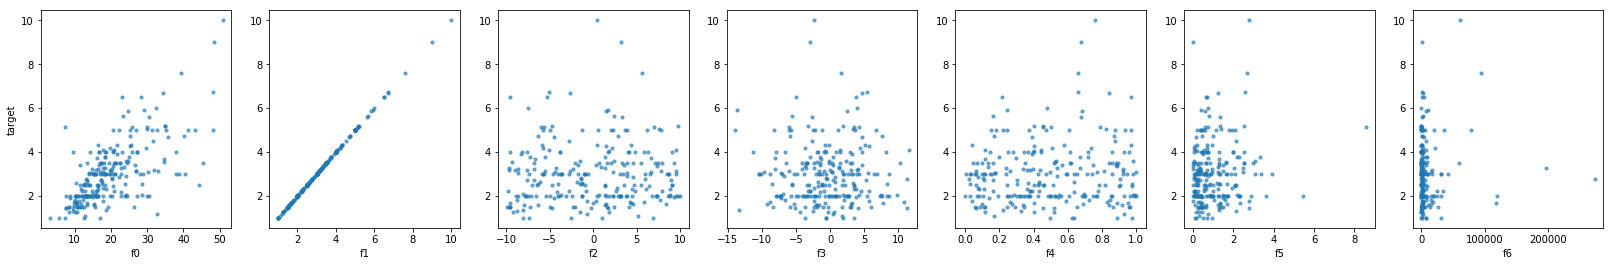

In [121]:
pair_plot(practice_data, practice_data['f1'])

Можно видеть, что L1-регуляризация выявила самый полезный (конечно, не рассматривая f1) с точки зрения линейной зависимости признак f0. Кроме того, с незначительными весами были взяты признаки f4, f5. 

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/12232591/

In [156]:
import numpy as np
from sklearn.base import BaseEstimator
import random

class HuberReg(BaseEstimator):
    def __init__(
            self,
            delta = 1.0,
            gd_type = 'stochastic',
            tolerance = 1e-4,
            max_iter = 1000,
            w0 = None,
            alpha = 1e-3,
            eta = 1e-2
        ):
        self.delta = delta
        self.gradient_type = gd_type
        self.tolerance = tolerance
        self.max_iterations_count = max_iter
        self.alpha = alpha
        self.eta = eta
        self.loss_history = []
        self.w = None
        self.initial_weights = w0
    
    def fit(self, x_data, y_data):
        self.init_weights(x_data)
        self.update_loss_history(x_data, y_data)
        
        previous, current = 0, 0
        for iteration in range(self.max_iterations_count):
            if self.gradient_type == 'full':
                current = self.alpha * previous - self.eta * self.calc_gradient(x_data, y_data)
            elif self.gradient_type == 'stochastic':
                row_index = random.randint(0, np.shape(x_data)[0] - 1)
                current = self.alpha * previous - self.eta * self.calc_gradient(
                    x_data[row_index:row_index + 1],
                    y_data[row_index:row_index + 1]
                )
            else:
                raise Exception('unknown gradient type')
            previous = current
            self.w += previous
            self.update_loss_history(x_data, y_data)
            if abs(np.linalg.norm(current)) < self.tolerance:
                break
        return self

    def init_weights(self, x_data):
        if self.initial_weights is None:
            self.w = np.random.rand(x_data.shape[1])
        else:
            self.w = self.initial_weights

    def predict(self, x_data):
        if self.w is None:
            raise Exception('Not trained yet')
        else:
            return x_data.dot(self.w)

    def calc_gradient(self, x_data, y_data):
        distation = self.calc_distation(x_data, y_data)
        A = self.delta * x_data.T.dot((distation > self.delta).astype(float)) * (-1)
        B = self.delta * x_data.T.dot((distation < -self.delta).astype(float))
        C = np.dot(
            x_data.T, (-distation * (np.absolute(-distation) <= self.delta).astype(float)))
        return (A + B + C) / x_data.shape[0]

    def update_loss_history(self, x_data, y_data):
        self.loss_history.append(self.calc_loss(x_data, y_data))

    def calc_loss(self, x_data, y_data):
        distation = self.calc_distation(x_data, y_data)
        A = 0.5 * (distation) ** 2
        B = self.delta * np.absolute(distation) - 0.5 * self.delta ** 2
        return np.mean(np.where(np.absolute(distation) <= self.delta, A, B))

    def calc_distation(self, x_data, y_data):
        return y_data - x_data.dot(self.w)

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [161]:
model = HuberReg()
model.fit(x_train, y_train)
model.calc_gradient(x_train, y_train)
r2_score(model.predict(np.array(x_test)), np.array(y_test))

-0.05079108347565242

Результат довольно низок, однако перебор параметров может помочь.

No handles with labels found to put in legend.
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


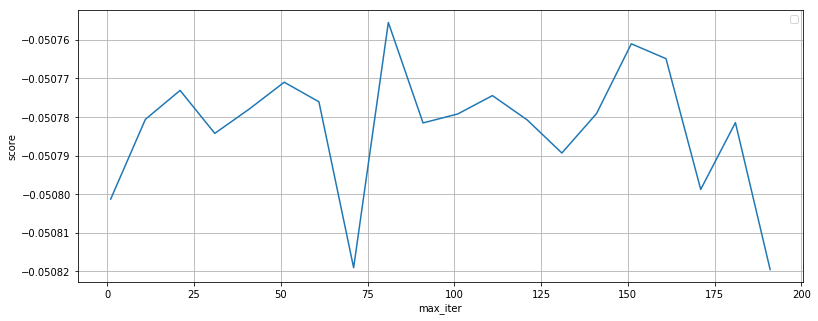

In [172]:
def build_and_print_max_iter_graph():
    scores = []
    values = np.arange(1, 200, 10)
    for it in values:
        model = HuberReg(max_iter=it)
        model.fit(x_train, y_train)
        scores.append(r2_score(model.predict(np.array(x_test)), np.array(y_test)))
    graph_by_points(values, scores, "max_iter", "score")
build_and_print_max_iter_graph()

No handles with labels found to put in legend.
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


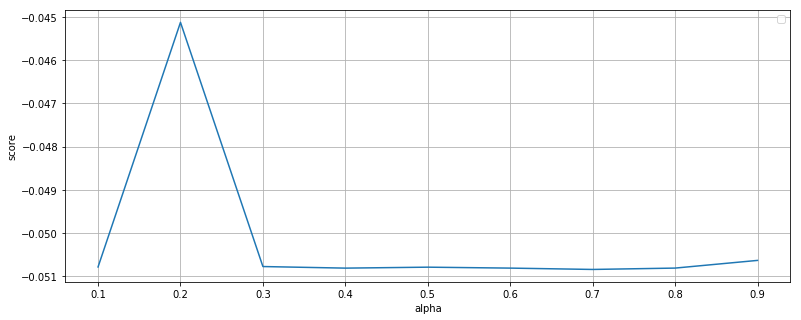

In [177]:
def build_and_print_alpha_graph():
    scores = []
    values = np.arange(0.1, 1, 0.1)
    for it in values:
        model = HuberReg(alpha=it)
        model.fit(x_train, y_train)
        scores.append(r2_score(model.predict(np.array(x_test)), np.array(y_test)))
    graph_by_points(values, scores, "alpha", "score")
build_and_print_alpha_graph()

Результат целиком и полностью согласуется с нашими ожиданиями.

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!